/var/folders/zs/rvz3b9gj4fl0_f4rlwvmt2p80000gn/T/ipykernel_4221/1152937758.py:12: RuntimeWarning: divide by zero encountered in log
  entropy = -prop_class_1*np.log(prop_class_1) - prop_class_2*np.log(prop_class_2)
/var/folders/zs/rvz3b9gj4fl0_f4rlwvmt2p80000gn/T/ipykernel_4221/1152937758.py:12: RuntimeWarning: invalid value encountered in multiply
  entropy = -prop_class_1*np.log(prop_class_1) - prop_class_2*np.log(prop_class_2)


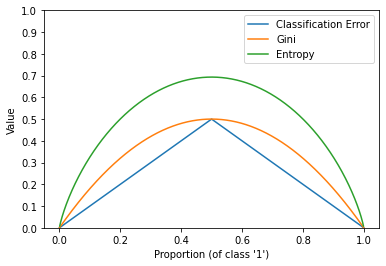

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prop_class_1 = np.arange(0, 1.001, 0.001)
prop_class_2 = 1 - prop_class_1

classification_error = 1 - np.maximum(prop_class_1, prop_class_2)

gini = prop_class_1*(1-prop_class_1) + prop_class_2*(1-prop_class_2)

entropy = -prop_class_1*np.log(prop_class_1) - prop_class_2*np.log(prop_class_2)

df = pd.DataFrame({'prop_class_1': prop_class_1, 
                   'prop_class_2': prop_class_2,
                   'classification_error': classification_error,
                   'gini': gini,
                   'entropy': entropy})

df = pd.melt(df, id_vars=['prop_class_1', 'prop_class_2'], 
             value_vars=['classification_error', 'gini', 'entropy'], 
             var_name='metric', value_name='value')

plt.plot('prop_class_1', 'value', data=df[df['metric'] == 'classification_error'], label='Classification Error')
plt.plot('prop_class_1', 'value', data=df[df['metric'] == 'gini'], label='Gini')
plt.plot('prop_class_1', 'value', data=df[df['metric'] == 'entropy'], label='Entropy')
plt.xlabel('Proportion (of class \'1\')')
plt.ylabel('Value')
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.show()